1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
flowers = load_iris()

In [4]:
dir(flowers)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(flowers.data , columns=flowers.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df = df[['petal length (cm)','petal width (cm)']]
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


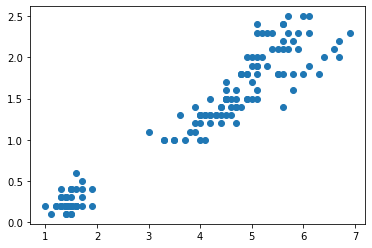

In [10]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.show()

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
df['target'] = y_predicted
df

<ipython-input-22-f4307253130a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = y_predicted


,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [25]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

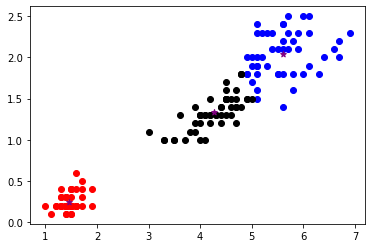

In [26]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

plt.scatter(df0['petal length (cm)'] , df0['petal width (cm)'] , color='red')
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'] , color='blue')
plt.scatter(df2['petal length (cm)'] , df2['petal width (cm)'] , color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.show()

In [39]:
sse = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit_predict(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\patoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.39117630105402,
 9.191170634920635,
 7.624193062579726,
 6.4802592066927085]

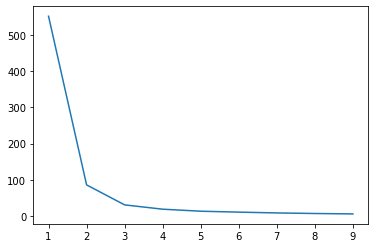

In [41]:
plt.plot(range(1,10),sse)